In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import time
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns

from global_variables import *
from data_preparation import * 
from cost import * 
from cross_validation import *
from performances import * 
from proj1_helpers import * 

## Load the data 

In [2]:
X, Y = load_data()

## Comparing performances for least-squares, Ridge-regression and logistic-regression Newton

### Without pre-processing

In [3]:
k = 10 # ten fold CV
k_fold = k 
y = Y 
x = X
seed = 20
k_indices = build_k_indices(y, k_fold, seed)


In [7]:
clean_method = '0'
method = 'least-squares'
err_cv_tr_ls, err_cv_te_ls, accuracy = cross_validation(y, x, k_indices, k, method, 1,  1,  0 , 0, clean_method)
print(np.mean(err_cv_tr_ls), np.std(err_cv_tr_ls), np.mean(accuracy))

[ 2  7  8  9 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
[ 2  7  8 14 15 16 17 18 19 20 21 22 24 25 26 27 28 29]
0.08945985342093368 0.00017670354630962715 0.73084


In [11]:
clean_method = '0'
method = 'ridge-regression'
lambdas = np.logspace(-10, 3, 15) # Range through "dichotomous" search
err_valid = np.empty(len(lambdas))
err_train = np.empty(len(lambdas))
for index_lambda, lambda_ in enumerate(lambdas):
    err_cv_tr, err_cv_val, accuracy = cross_validation(y, x, k_indices, k, method, 1, 1, 0, lambda_, clean_method)
    err_valid[index_lambda] = np.mean(err_cv_val) 
    err_train[index_lambda] = np.mean(err_cv_tr) 
    # best_lambda chosen to minimize the mean generalization error
best_lambda = lambdas[np.argmin(err_lambda)]
# The code should also provide the corresponding error values 
print(best_lambda)    

4.393970560760795e-06


[1.00000000e-10 8.48342898e-10 7.19685673e-09 6.10540230e-08
 5.17947468e-07 4.39397056e-06 3.72759372e-05 3.16227766e-04
 2.68269580e-03 2.27584593e-02 1.93069773e-01 1.63789371e+00
 1.38949549e+01 1.17876863e+02 1.00000000e+03]
[0.08477989 0.08477986 0.08477985 0.08477987 0.08477998 0.08478091
 0.08478884 0.08485571 0.08540191 0.08928456 0.10868252 0.14766462
 0.16703108 0.17077644 0.17126742]
[0.0847529  0.08475292 0.08475292 0.08475294 0.08475305 0.08475398
 0.08476193 0.084829   0.08537649 0.08926334 0.10866639 0.14765861
 0.16702999 0.1707763  0.17126741]


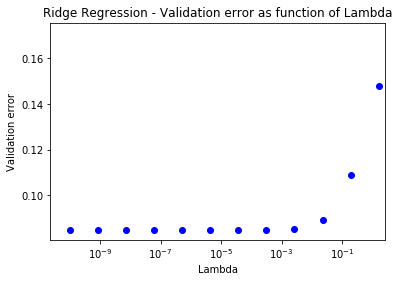

In [30]:
print(lambdas)
print(err_valid)
print(err_train)
# plot figure
plt.plot(lambdas, err_valid, 'bo', )
plt.xscale('log')
plt.xlim(right=np.e-0)
plt.xlabel("Lambda")
plt.ylabel("Validation error")
plt.title("Ridge Regression - Validation error as function of Lambda")
plt.show()

In [ ]:
# Probably would be smarter to get the errors directly above ...
method = 'ridge-regression'
lambda_ = best_lambda
err_cv_tr_ridge, err_cv_te_ridge, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr_ridge), np.var(err_cv_tr_ridge), accuracy)

In [ ]:
max_iters= 10
method = 'log-newton'
gammas = np.logspace(-10, 0, 30)
err_gamma = np.empty(len(gammas))
for index_gamma, gamma in enumerate(gammas):
    _, err_cv_val, accuracy = cross_validation(y, x, k_indices, k, method, 1, max_iters, gamma, lambda_, clean_method)
    err_gamma[index_gamma] = np.mean(err_cv_val) 
# best_gamma chosen to minimize the mean generalization error
best_gamma = gammas[np.argmin(err_gamma)]
# The code should also provide the corresponding error values 
print(best_gamma)    

In [ ]:
# Probably would be smarter to get the errors directly above ...
gamma = best_gamma
err_cv_tr_newton, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr_newton), np.var(err_cv_tr_newton), accuracy)

In [ ]:
## TO DO : 
# Do it for clean_method in ['raw', '', '0', 'mean', 'media']
# for all 3 methods ('least-squares', 'ridge-regression', 'log-newton')
# Add the accuracy
# Write a script working for all hyper-parameters (gamma for newton et lambda for ridge) ?! 


## Checking if all functions work well but not to be included 

In [ ]:
k = 10 # ten fold CV
k_fold = k 
y = Y 
x = X
seed = 20
k_indices = build_k_indices(y, k_fold, seed)

In [ ]:
# Variable to decide on cleaning method ( see function clean_features)
clean_method = 'median'

### Least squares normal eq

In [ ]:
method = 'least-squares'
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, 1,  1,  0 , 0, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

### Least squares GD 

In [ ]:
method = 'least-squares-GD'
max_iters = 50
gamma = 0.01
batch_size = 1
lambda_ = 0
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

### Least-squares SGD  

In [ ]:
method = 'least-squares-SGD' 
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

### Ridge-regression

In [ ]:
method = 'ridge-regression'
lambda_ = 1
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

### Log regression 

In [ ]:
method = 'log'
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

In [ ]:
method = 'regularized-log'
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

In [ ]:
method = 'log-newton'
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)

## Optimizing models with cross-validation

In [ ]:
# CV testing gamma and lambda inside same loop

X, Y = load_data()
k = 10 # ten fold CV
k_fold = k 
y = Y 
x = X
seed = 20
k_indices = build_k_indices(y, k_fold, seed)
clean_method = '0'
batch_size = 1
max_iters = 100

method = 'regularized-log'
lambdas = np.logspace(-5, 3, 8)
#lambdas = [0]
gammas = np.logspace(-20, 2, 13)
err = np.empty([len(lambdas), len(gammas)])
acc = np.empty([len(lambdas), len(gammas)])
for index_lambda, lambda_ in enumerate(lambdas):
    print("L: " + str(index_lambda) + "  "+str(lambda_))
    for index_gamma, gamma in enumerate(gammas):
        print("G: " + str(index_gamma) + "  "+ str(gamma))
        err_cv_tr, err_cv_val, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
        err[index_lambda, index_gamma] = np.mean(err_cv_val)
        print(np.mean(err_cv_val))
        acc[index_lambda, index_gamma] = accuracy
        print(accuracy)
print(err)
print(acc)
best_combination = np.argwhere(err == np.min(err))
print("least error where :" + str(best_combination))
best_acc = np.argwhere(acc == np.max(acc))
print("highest accuracy where :" + str(best_acc))
best_lambda = lambdas[best_combination[0][0]]
best_gamma = gammas[best_combination[0][1]]
# The code should also provide the corresponding error values 
print("Best lambda: " + str(best_lambda))
print("Best gamma: " + str(best_gamma))


In [ ]:
method = 'ridge-regression'
lambda_ = best_lambda
err_cv_tr, err_cv_te, accuracy = cross_validation(y, x, k_indices, k, method, batch_size, max_iters, gamma, lambda_, clean_method)
print(np.mean(err_cv_tr), np.var(err_cv_tr), accuracy)